### prepare data

In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split
df = pd.read_csv('./done_data/new_house_merge.csv')
df = df.drop(['Area','鄉鎮市區','都市土地使用分區','主要用途','主要建材','建物現況格局-隔間','有無管理組織','車位類別','建物類型'], axis = 1)
y_df = df['每坪單價']
x_df = df.drop(['每坪單價'], axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, random_state=0)

### NN神經網路

class sklearn.neural_network.MLPRegressor(hidden_layer_sizes=100, activation='relu', *, solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000

In [7]:
from sklearn.neural_network import MLPRegressor
regr_score = []

for layer in range(11,142,10):
    regr = MLPRegressor(hidden_layer_sizes=layer, random_state=1, max_iter=10000).fit(x_train, y_train)
    regr_score.append([layer,regr.score(x_train, y_train),regr.score(x_test, y_test)])
    
regr_score_df = pd.DataFrame(regr_score, columns=['layer_sizes','R2(Training)','R2 (Test)'])
regr_score_df.head()

,layer_sizes,R2(Training),R2 (Test)
0,11,0.330782,0.318104
1,21,0.370364,0.354068
2,31,0.324718,0.305356
3,41,0.371805,0.355335
4,51,0.309365,0.298251


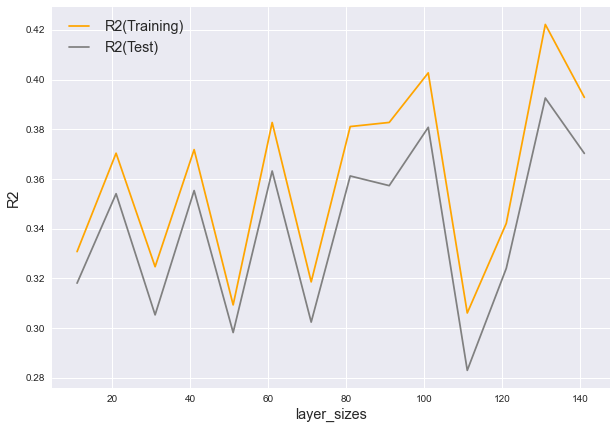

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')

fig = plt.figure(figsize=(10,7))
plt.plot(regr_score_df['layer_sizes'], regr_score_df['R2(Training)'], color='orange',label = 'R2(Training)')
plt.plot(regr_score_df['layer_sizes'], regr_score_df['R2 (Test)'], color='gray',label = 'R2(Test)')

plt.legend(numpoints = 3,fontsize = 'x-large')
plt.xlabel('layer_sizes',fontsize = 'x-large')
plt.ylabel('R2',fontsize = 'x-large');

### DNN神經網路

In [36]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [50]:
# 要先進行RESHAPE成向量
import numpy as np
try:
    x_train = x_train.astype('float32').values
    x_test = x_test.astype('float32').values
    y_train = y_train.astype('float32').values
    y_test = y_test.astype('float32').values
except:
    pass

# x_train = x_train.reshape([x_train.shape[0], -1])
# x_test = x_test.reshape([x_test.shape[0], -1])


x_train = np.expand_dims(x_train,axis=1)
x_test = np.expand_dims(x_test,axis=1)
# y_train = np.expand_dims(y_train,axis=0)
# y_test = np.expand_dims(y_test,axis=0)



print(x_train.shape, ' ', y_train.shape)
print(x_test.shape, ' ', y_test.shape)

(3939, 1, 37)   (3939,)
(1313, 1, 37)   (1313,)


In [51]:
model = keras.Sequential([
    layers.Flatten(input_shape=(3939,37)),
#     layers.Dense(64, activation='relu', input_shape=(3939,37)),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer=keras.optimizers.Adam(),
             loss=keras.losses.SparseCategoricalCrossentropy(),
             metrics=['mse'])
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 145743)            0         
_________________________________________________________________
dense_36 (Dense)             (None, 64)                9327616   
_________________________________________________________________
dense_37 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_38 (Dense)             (None, 10)                650       
Total params: 9,332,426
Trainable params: 9,332,426
Non-trainable params: 0
_________________________________________________________________


In [52]:
history = model.fit(x_train, y_train, epochs=100)

Epoch 1/100


ValueError: in user code:

    /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:805 train_function  *
        return step_function(self, iterator)
    /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:795 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:788 run_step  **
        outputs = model.train_step(data)
    /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:754 train_step
        y_pred = self(x, training=True)
    /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer.py:1012 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:375 call
        return super(Sequential, self).call(inputs, training=training, mask=mask)
    /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/keras/engine/functional.py:424 call
        return self._run_internal_graph(
    /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/keras/engine/functional.py:560 _run_internal_graph
        outputs = node.layer(*args, **kwargs)
    /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/keras/engine/input_spec.py:255 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer dense_36 is incompatible with the layer: expected axis -1 of input shape to have value 145743 but received input with shape (None, 37)


In [44]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc='upper left')
plt.show()

NameError: name 'history' is not defined

In [44]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


path = 'mnist.npz'
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data(path)



# (x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data(path='mnist.npz')
x_train = x_train.reshape([x_train.shape[0], -1])
x_test = x_test.reshape([x_test.shape[0], -1])

model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(784,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])
model.compile(optimizer=keras.optimizers.Adam(),
             loss=keras.losses.SparseCategoricalCrossentropy(),
             metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=256, epochs=100, validation_split=0.3, verbose=2)
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc='upper left')
plt.show()

Exception: URL fetch failure on https://storage.googleapis.com/tensorflow/tf-keras-datasets/mnist.npz: None -- [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1123)